In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_base_de_dados = pd.read_csv(r'C:\RPA\desafio_projetos\desafio_fadesp\tarefa-02-I2A2\Dataset_de_200_Comunidades_para_Analise_Ambiental.csv')

In [11]:
df_base_de_dados.head()

,Comunidade,Município,Estado,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Presença de Escola (Sim/Não),Presença de Unidade de Saúde (Sim/Não)
0,Comunidade 1,SÃO DOMINGOS DO CAPIM,Pará,25.6,86.5,22.9,2863.0,123.2,0,74.7,Sim,Não
1,Comunidade 2,SALINÓPOLIS,Pará,12.9,99.3,21.8,799.0,120.3,11,87.3,Sim,Não
2,Comunidade 3,TRACUATEUA,Pará,81.3,58.9,64.5,1924.0,104.8,5,43.9,Não,Sim
3,Comunidade 4,SÃO MIGUEL DO GUAMÁ,Pará,81.5,56.0,25.5,1715.0,42.3,0,5.3,Sim,Sim
4,Comunidade 5,MAGALHÃES BARATA,Pará,58.8,84.3,39.4,1990.0,89.4,9,17.0,Sim,Sim


In [14]:
df_base_de_dados.columns

Index(['Comunidade', 'Município', 'Estado', 'Índice de Desmatamento (%)',
       'Acesso à Água Potável (%)', 'Cobertura Vegetal (%)',
       'Renda Média Mensal (R$)', 'Densidade Populacional (hab/km²)',
       'Frequência de Queimadas (ano)', 'Distância de Área Urbana (km)',
       'Presença de Escola (Sim/Não)',
       'Presença de Unidade de Saúde (Sim/Não)'],
      dtype='object')

C:\Users\fabio\AppData\Local\Temp\ipykernel_81440\2815694032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Índice de Desmatamento (%)', y='Município', data=top20, palette='flare')


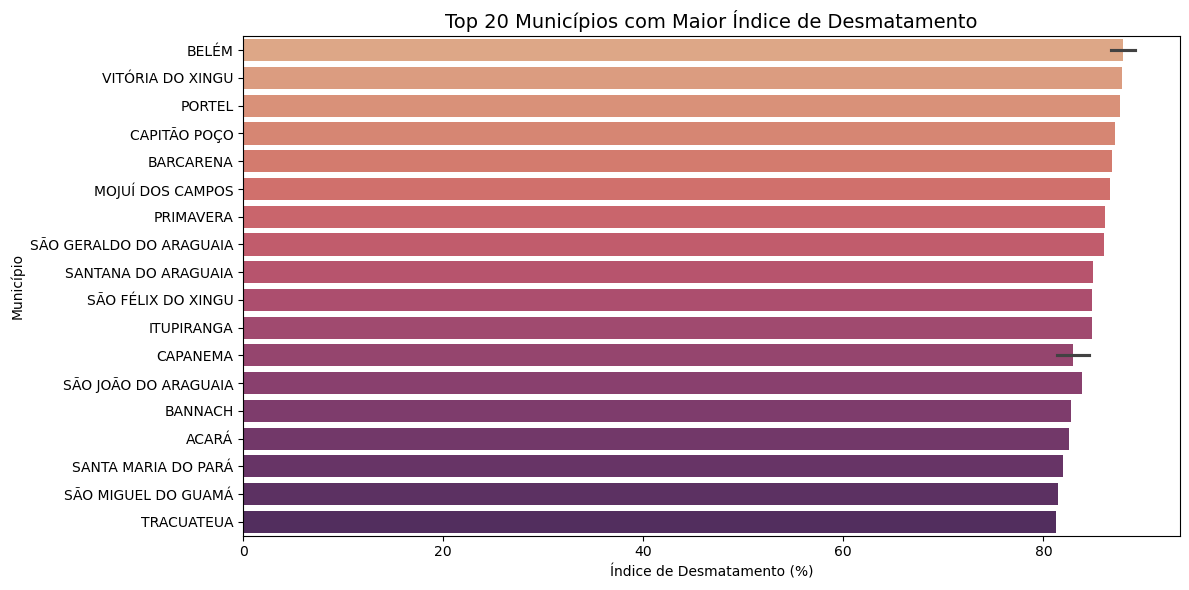

In [16]:
df = pd.DataFrame(df_base_de_dados)

top20 = df.sort_values(by='Índice de Desmatamento (%)', ascending=False).head(20)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Índice de Desmatamento (%)', y='Município', data=top20, palette='flare')
plt.title('Top 20 Municípios com Maior Índice de Desmatamento', fontsize=14)
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Município')
plt.tight_layout()
plt.show()